# Linear Regression
***

In [2]:
#Imports start
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [4]:
%matplotlib inline
# sns.set_style("whitegrid")

In [5]:
from sklearn.datasets import load_boston
#Finished importing

In [6]:
boston = load_boston()

Text(0,0.5,'# of houses')

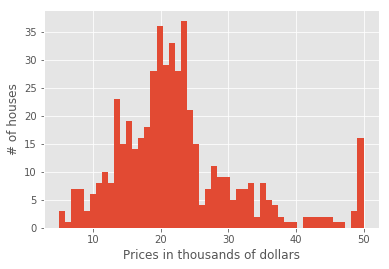

In [7]:
plt.hist(boston.target,bins = 50)
plt.xlabel('Prices in thousands of dollars')
plt.ylabel('# of houses')

Text(0.5,0,'Number of rooms')

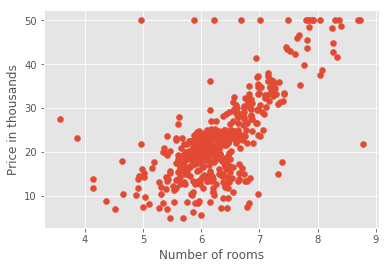

In [8]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in thousands')
plt.xlabel('Number of rooms')

In [9]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_df['Price'] = boston.target

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


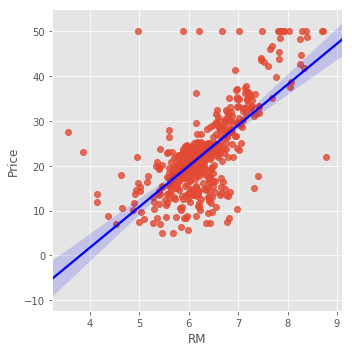

In [12]:
sns.lmplot('RM','Price',data=boston_df,line_kws={
    'color':'blue'
})

In [13]:
x = boston_df.RM
x.shape

(506,)

In [14]:
X = np.vstack(boston_df.RM)

In [15]:
X.shape

(506, 1)

In [16]:
Y = boston_df['Price']

In [17]:
X = np.array([[value,1] for value in X])

In [18]:
m,b= np.linalg.lstsq(X,Y)[0]

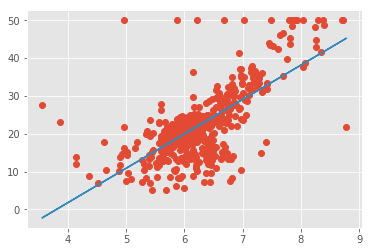

In [19]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x,m*x + b,label='Best Fit Line')

In [20]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]
rmse = np.sqrt(error_total/len(X))
print(rmse)

[ 6.60307139]


In [21]:
import sklearn
from sklearn.linear_model import LinearRegression

In [22]:
lreg = LinearRegression()

In [23]:
X_m = boston_df.drop('Price',1)
Y_t = boston_df.Price

In [24]:
lreg.fit(X_m,Y_t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lreg.intercept_

36.491103280363404

In [26]:
len(lreg.coef_)

13

In [27]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [31]:
X_train, X_test,Y_train,Y_test= sklearn.model_selection.train_test_split(X,boston_df.Price)

In [39]:
lreg = LinearRegression()

In [40]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [43]:
print(np.mean((Y_train - pred_train) ** 2))
print(np.mean((Y_test - pred_test) ** 2))


46.96733962926808
33.60561529875049


Text(0.5,1,'Residual plot')

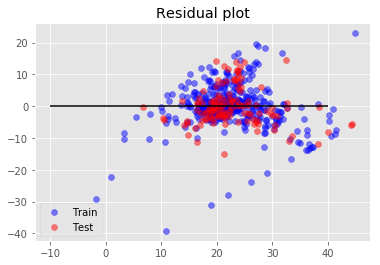

In [51]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)
test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=40)
plt.legend((train,test),('Train','Test'),loc='lower left')
plt.title('Residual plot')